# Installations

In [1]:
import sys
!{sys.executable} -m pip install spacy

In [2]:
!{sys.executable} -m pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl

     - 0 bytes ? 0:00:00
     - 0 bytes ? 0:00:00


ERROR: Wheel 'en-core-web-sm' located at C:\Users\tharu\AppData\Local\Temp\pip-unpack-ou0i1zpv\en_core_web_sm-3.7.1-py3-none-any.whl is invalid.


In [3]:
import sys
!{sys.executable} -m pip install sentencepiece nltk

In [4]:
import sys
!{sys.executable} -m pip install scikit-learn

In [5]:
import sys
!{sys.executable} -m pip install gensim

In [6]:
import sys
!{sys.executable} -m pip install sentence-transformers

In [7]:
pip install wordcloud

In [8]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install contractions

Note: you may need to restart the kernel to use updated packages.


# Commit to GitHub

In [10]:
!pwd                # shows your current folder
!git status         # check uncommitted changes
!git add .
!git commit -m "finetuning preprocesssing pipeline,"
!git push origin main

'pwd' is not recognized as an internal or external command,
operable program or batch file.


On branch main
Your branch is ahead of 'origin/main' by 9 commits.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean


[main ffbac8f] finetuning preprocesssing pipeline,
 1 file changed, 59 insertions(+), 1408 deletions(-)


error: RPC failed; HTTP 408 curl 22 The requested URL returned error: 408
send-pack: unexpected disconnect while reading sideband packet
fatal: the remote end hung up unexpectedly
Everything up-to-date


# Import Statements

In [11]:
import torch
torch.cuda.is_available(), torch.cuda.get_device_name(0)

(True, 'NVIDIA GeForce RTX 4060 Laptop GPU')

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re
from nltk import ngrams
from textblob import TextBlob
import nltk
import re
import emoji
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import sentencepiece as spm
import collections
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from collections import Counter
import itertools
from tqdm import tqdm
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
import numpy as np
from sentence_transformers import SentenceTransformer

stop_words = set(stopwords.words('english'))

import langdetect
from langdetect import detect

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
nltk.download('omw-1.4')

import spacy
nlp = spacy.load("en_core_web_sm")
print("spaCy loaded OK!")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tharu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\tharu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\tharu/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\tharu/nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package wordnet to C:\Users\tharu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\tharu/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


spaCy loaded OK!


# Initial Preprocessing Steps

In [13]:
# Load dataset
df_posts = pd.read_csv("Final_Posts_Data.csv")
df_posts.head()

C:\Users\tharu\AppData\Local\Temp\ipykernel_24124\3966237626.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_posts = pd.read_csv("Final_Posts_Data.csv")


,type,source,keyword,id,created_utc,author,subreddit,content,score,num_comments,parent_post
0,post,new,NaN,1otaemb,1.762771e+09,Cookiehere6969,srilanka,Is this a Scam or good investment? Haritha Lan...,2.0,1.0,NaN
1,post,new,NaN,1otaam5,1.762770e+09,oshan789,srilanka,Villa units for sale in Unawatuna Sri Lanka ! ...,3.0,0.0,NaN
2,post,new,NaN,1ot9w1v,1.762769e+09,mgssjjsks,srilanka,Whats your hot take on Sri Lanka as the title ...,3.0,8.0,NaN
3,post,new,NaN,1ot9kwe,1.762768e+09,Critical_Rise_exe,srilanka,Is the rs.11 deals real in Daraz?,1.0,3.0,NaN
4,post,new,NaN,1ot9h2f,1.762767e+09,No-Leave8971,srilanka,Need advice from the experts 🙏 [](https://www....,2.0,0.0,NaN


In [14]:
# Dataset overview
print("Dataset shape:", df_posts.shape)

Dataset shape: (70861, 11)


In [15]:
# Check for duplicates based on a specific column
duplicates_name = df_posts.duplicated(subset=['content'])
print("\nDuplicates based on 'content':")
print(df_posts[duplicates_name])


Duplicates based on 'content':
Empty DataFrame
Columns: [type, source, keyword, id, created_utc, author, subreddit, content, score, num_comments, parent_post]
Index: []


In [16]:
# Missing Values
missing_counts = df_posts.isnull().sum()
print("Missing values per column:\n", missing_counts)

Missing values per column:
 type                0
source              0
keyword         53250
id                  0
created_utc         0
author           2981
subreddit           0
content             1
score               8
num_comments    52021
parent_post     18848
dtype: int64


In [17]:
# Missing Values
missing_counts = df_posts.isnull().sum()
print("Missing values per column:\n", missing_counts) 

Missing values per column:
 type                0
source              0
keyword         53250
id                  0
created_utc         0
author           2981
subreddit           0
content             1
score               8
num_comments    52021
parent_post     18848
dtype: int64


In [18]:
# Fill 'keyword' missing values
df_posts['keyword'] = df_posts['keyword'].fillna('no keyword')

# Fill 'author' missing values
df_posts['author'] = df_posts['author'].fillna('no author')

# Fill 'score' missing values with the median
median_score = df_posts['score'].median()
df_posts['score'] = df_posts['score'].fillna(median_score)

# Fill 'num_comments' missing values with 0 only where source == 'comments'
mask = df_posts['source'] == 'comments'
df_posts.loc[mask, 'num_comments'] = df_posts.loc[mask, 'num_comments'].fillna(0)

# Fill 'parent_post' missing values
df_posts['parent_post'] = df_posts['parent_post'].fillna('no post')

# Drop rows where 'content' is missing (only 1 row)
df_posts = df_posts.dropna(subset=['content'])
# reset the index
df_posts.reset_index(drop=True, inplace=True)

missing_counts = df_posts.isnull().sum()
print("Missing values per column:\n", missing_counts) 

print("\n Dataset shape:", df_posts.shape)

df_posts.head()

Missing values per column:
 type                0
source              0
keyword             0
id                  0
created_utc         0
author              0
subreddit           0
content             0
score               0
num_comments    52020
parent_post         0
dtype: int64

 Dataset shape: (70860, 11)


,type,source,keyword,id,created_utc,author,subreddit,content,score,num_comments,parent_post
0,post,new,no keyword,1otaemb,1.762771e+09,Cookiehere6969,srilanka,Is this a Scam or good investment? Haritha Lan...,2.0,1.0,no post
1,post,new,no keyword,1otaam5,1.762770e+09,oshan789,srilanka,Villa units for sale in Unawatuna Sri Lanka ! ...,3.0,0.0,no post
2,post,new,no keyword,1ot9w1v,1.762769e+09,mgssjjsks,srilanka,Whats your hot take on Sri Lanka as the title ...,3.0,8.0,no post
3,post,new,no keyword,1ot9kwe,1.762768e+09,Critical_Rise_exe,srilanka,Is the rs.11 deals real in Daraz?,1.0,3.0,no post
4,post,new,no keyword,1ot9h2f,1.762767e+09,No-Leave8971,srilanka,Need advice from the experts 🙏 [](https://www....,2.0,0.0,no post


In [19]:
# converting date column into a readable format
df_posts['created_date'] = pd.to_datetime(df_posts['created_utc'], unit='s').dt.date
df_posts['created_time'] = pd.to_datetime(df_posts['created_utc'], unit='s').dt.time

# Drop the original 'created_utc' column
df_posts.drop(columns=['created_utc'], inplace=True)
df_posts


,type,source,keyword,id,author,subreddit,content,score,num_comments,parent_post,created_date,created_time
0,post,new,no keyword,1otaemb,Cookiehere6969,srilanka,Is this a Scam or good investment? Haritha Lan...,2.0,1.0,no post,2025-11-10,10:33:16
1,post,new,no keyword,1otaam5,oshan789,srilanka,Villa units for sale in Unawatuna Sri Lanka ! ...,3.0,0.0,no post,2025-11-10,10:26:02
2,post,new,no keyword,1ot9w1v,mgssjjsks,srilanka,Whats your hot take on Sri Lanka as the title ...,3.0,8.0,no post,2025-11-10,10:00:29
3,post,new,no keyword,1ot9kwe,Critical_Rise_exe,srilanka,Is the rs.11 deals real in Daraz?,1.0,3.0,no post,2025-11-10,09:40:57
4,post,new,no keyword,1ot9h2f,No-Leave8971,srilanka,Need advice from the experts 🙏 [](https://www....,2.0,0.0,no post,2025-11-10,09:33:57
...,...,...,...,...,...,...,...,...,...,...,...,...
70855,img_post,url,no keyword,1ozebo7,Dhanagg,srilanka,NEWSWIRE\n\nSri Lanka flags\noutside Rawalpind...,3.0,NaN,no post,2025-11-17,11:55:19
70856,img_post,url,no keyword,1ozdn89,Unreal_realist-7381,srilanka,DOT STUDIOS PRESENTS\nPASAN DOMINIC HASALAKA T...,3.0,NaN,no post,2025-11-17,11:16:00
70857,img_post,url,no keyword,1ozdi55,wiknew1,srilanka,sarasavi fi Q\n\nTHE BOOKSHOP\nOL LIST SARASAV...,3.0,NaN,no post,2025-11-17,11:07:48
70858,img_post,url,no keyword,1ozbed2,smllcheeseburger,srilanka,Lamborghini Urus Twin turbo V8 2025\n\nPosted ...,3.0,NaN,no post,2025-11-17,08:54:42


### Drop non-english data (sinhala and tamil)

In [20]:
def detect_language(text):
    try:
        return detect(text)
    except langdetect.lang_detect_exception.LangDetectException:
        return 'unknown'

# Create a new column for language
df_posts['language'] = df_posts['content'].apply(detect_language)

In [21]:
# Keep only English posts
df_posts = df_posts[df_posts['language'] == 'en'].copy()

# Drop the language column
df_posts.drop(columns=['language'], inplace=True)
print(df_posts.shape)

df_posts.head()

(69757, 12)


,type,source,keyword,id,author,subreddit,content,score,num_comments,parent_post,created_date,created_time
0,post,new,no keyword,1otaemb,Cookiehere6969,srilanka,Is this a Scam or good investment? Haritha Lan...,2.0,1.0,no post,2025-11-10,10:33:16
1,post,new,no keyword,1otaam5,oshan789,srilanka,Villa units for sale in Unawatuna Sri Lanka ! ...,3.0,0.0,no post,2025-11-10,10:26:02
2,post,new,no keyword,1ot9w1v,mgssjjsks,srilanka,Whats your hot take on Sri Lanka as the title ...,3.0,8.0,no post,2025-11-10,10:00:29
3,post,new,no keyword,1ot9kwe,Critical_Rise_exe,srilanka,Is the rs.11 deals real in Daraz?,1.0,3.0,no post,2025-11-10,09:40:57
4,post,new,no keyword,1ot9h2f,No-Leave8971,srilanka,Need advice from the experts 🙏 [](https://www....,2.0,0.0,no post,2025-11-10,09:33:57


# Text Cleaning Pipeline

In [53]:
# import re
# import emoji
# import unicodedata
# import contractions
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer

# stop_words = set(stopwords.words("english"))
# lemmatizer = WordNetLemmatizer()

# # Mapping emojis → sentiment categories (you can expand this)
# emoji_sentiment_map = {
#     "joy": "EMO_POS",
#     "grin": "EMO_POS",
#     "smile": "EMO_POS",
#     "heart": "EMO_POS",
#     "sob": "EMO_NEG",
#     "cry": "EMO_NEG",
#     "angry": "EMO_NEG",
#     "rage": "EMO_NEG",
# }
# def map_emoji_to_sentiment(word):
#     for key, val in emoji_sentiment_map.items():
#         if key in word:
#             return val
#     return word


# def clean_text(text, remove_stopwords=False, lemmatize=False):
#     if not isinstance(text, str):
#         return ""

#     # Normalize Unicode + lowercase
#     text = unicodedata.normalize("NFKC", text.lower())

#     # Expand contractions
#     text = contractions.fix(text)

#     # Replace emojis with words → then map to positive/negative sentiment tokens
#     text = emoji.demojize(text, delimiters=(" ", " "))
#     text = " ".join(map_emoji_to_sentiment(w) for w in text.split())

#     # Remove URLs + Reddit patterns
#     text = re.sub(r"http\S+|www\.\S+", "", text)
#     text = re.sub(r"u\/\w+|r\/\w+", "", text)

#     # Remove filler words
#     text = re.sub(r"\b(lol|haha+|hah+|omg|uh+|umm+|hmm+)\b", " ", text)

#     # Remove numbers
#     text = re.sub(r"\d+", " ", text)

#     # Remove punctuation (keep apostrophes for now)
#     text = re.sub(r"[^\w\s']", " ", text)

#     # Normalize repeated characters ("soooo" → "soo")
#     text = re.sub(r"(.)\1{2,}", r"\1\1", text)

#     # Handle negations ("not good" → "not_good")
#     text = re.sub(r"\bnot\s+(\w+)", r"not_\1", text)

#     # Remove extra apostrophes
#     text = re.sub(r"'{2,}", "'", text)

#     # Remove stopwords
#     if remove_stopwords:
#         text = " ".join(w for w in text.split() if w not in stop_words)

#     # Lemmatization
#     if lemmatize:
#         text = " ".join(lemmatizer.lemmatize(w) for w in text.split())

#     # Final whitespace cleanup
#     text = re.sub(r"\s+", " ", text).strip()

#     return text

import re
import unicodedata
import contractions
import emoji
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, sent_tokenize, word_tokenize

# Download necessary NLTK resources (run once)
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

# Mapping emojis → sentiment categories
emoji_sentiment_map = {
    "joy": "EMO_POS",
    "grin": "EMO_POS",
    "smile": "EMO_POS",
    "heart": "EMO_POS",
    "sob": "EMO_NEG",
    "cry": "EMO_NEG",
    "angry": "EMO_NEG",
    "rage": "EMO_NEG",
}

def map_emoji_to_sentiment(word):
    for key, val in emoji_sentiment_map.items():
        if key in word:
            return val
    return word

# Map NLTK POS tag → WordNet POS
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def clean_text(text, remove_stopwords=False, lemmatize=False):
    if not isinstance(text, str):
        return ""

    # Normalize Unicode + lowercase
    text = unicodedata.normalize("NFKC", text.lower())

    # Expand contractions
    text = contractions.fix(text)

    # Replace emojis with words → then map to positive/negative sentiment tokens
    text = emoji.demojize(text, delimiters=(" ", " "))
    text = " ".join(map_emoji_to_sentiment(w) for w in text.split())

    # Remove URLs + Reddit patterns
    text = re.sub(r"http\S+|www\.\S+", "", text)
    text = re.sub(r"u\/\w+|r\/\w+", "", text)

    # Remove filler words
    text = re.sub(r"\b(lol|haha+|hah+|omg|uh+|umm+|hmm+)\b", " ", text)

    # Remove numbers
    text = re.sub(r"\d+", " ", text)

    # Remove punctuation (keep apostrophes for now)
    text = re.sub(r"[^\w\s']", " ", text)

    # Normalize repeated characters ("soooo" → "soo")
    text = re.sub(r"(.)\1{2,}", r"\1\1", text)

    # Handle negations ("not good" → "not_good")
    text = re.sub(r"\bnot\s+(\w+)", r"not_\1", text)

    # Remove extra apostrophes
    text = re.sub(r"'{2,}", "'", text)

    # Tokenize sentences
    sentences = sent_tokenize(text)

    processed_words = []

    for sent in sentences:
        words = word_tokenize(sent)

        # Remove stopwords if requested
        if remove_stopwords:
            words = [w for w in words if w not in stop_words]

        # POS tagging and lemmatization
        if lemmatize:
            tags = pos_tag(words)
            words = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in tags]

        processed_words.extend(words)

    # Join back into single string and clean extra spaces
    text = " ".join(processed_words)
    text = re.sub(r"\s+", " ", text).strip()

    return text


[nltk_data] Downloading package punkt to C:\Users\tharu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\tharu/nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to C:\Users\tharu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tharu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\tharu/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [54]:
# df_posts["content_cleaned"] = df_posts["content"].apply(lambda x: clean_text(x, remove_stopwords=True, lemmatize=True))
df_posts["content_cleaned"] = df_posts["content"].apply(lambda x: clean_text(x, remove_stopwords=True, lemmatize=True))

In [55]:
df_posts.head(10)

,type,source,keyword,id,author,subreddit,content,score,num_comments,parent_post,created_date,created_time,content_cleaned,word_count
0,post,new,no keyword,1otaemb,Cookiehere6969,srilanka,Is this a Scam or good investment? Haritha Lan...,2.0,1.0,no post,2025-11-10,10:33:16,scam good investment haritha lanka agarwood pl...,33
1,post,new,no keyword,1otaam5,oshan789,srilanka,Villa units for sale in Unawatuna Sri Lanka ! ...,3.0,0.0,no post,2025-11-10,10:26:02,villa unit sale unawatuna sri lanka new projec...,101
4,post,new,no keyword,1ot9h2f,No-Leave8971,srilanka,Need advice from the experts 🙏 [](https://www....,2.0,0.0,no post,2025-11-10,09:33:57,need advice expert folded_hands plan podcast f...,63
5,post,new,no keyword,1ot9dyw,hotstar10,srilanka,Confusion Over Paddock Club Nugegoda’s Halal S...,0.0,4.0,no post,2025-11-10,09:28:19,confusion paddock club nugegoda halal status o...,42
6,post,new,no keyword,1ot9da2,prav_u,srilanka,Tour to Kanneliya Rain Forest I’m planning a g...,1.0,1.0,no post,2025-11-10,09:26:59,tour kanneliya rain forest plan group visit ka...,35
7,post,new,no keyword,1ot8r8a,Unusual-Witness-7304,srilanka,"ChatGPT vs electricians, my house wiring is no...",6.0,5.0,no post,2025-11-10,08:46:44,chatgpt v electrician house wire science exper...,96
8,post,new,no keyword,1ot8lir,negative-impactr8888,srilanka,SLTMobitel changed the superuser router passwo...,3.0,0.0,no post,2025-11-10,08:36:16,sltmobitel change superuser router password tr...,54
9,post,new,no keyword,1ot8l95,Jakesbond007,srilanka,Can we hand carry medicine from abroad into Sr...,1.0,3.0,no post,2025-11-10,08:35:47,hand carry medicine abroad sri lanka hello med...,26
10,post,new,no keyword,1ot8kjb,sorenxv,srilanka,How Do I Get A Letter From Church? My bestfrie...,2.0,2.0,no post,2025-11-10,08:34:33,get letter church bestfriend 's newborn get ba...,36
11,post,new,no keyword,1ot87vn,ScreenshotSmuggler,srilanka,Guess where this video is from. Let's see how ...,21.0,43.0,no post,2025-11-10,08:11:13,guess video let u see far get province distric...,26


## Check preprocessing 

### Check Lemmatization and POS Tagging Quality

In [52]:
from nltk import pos_tag, word_tokenize

test_words = ["running", "ran", "cars", "better", "studies", "mice"]
tags = pos_tag(test_words)
print(tags)

sentence = "I am running. He ran. The mice are fast."
tokens = word_tokenize(sentence)
tags = pos_tag(tokens)
print(tags)


[('running', 'VBG'), ('ran', 'NN'), ('cars', 'NNS'), ('better', 'JJR'), ('studies', 'NNS'), ('mice', 'VBP')]
[('I', 'PRP'), ('am', 'VBP'), ('running', 'VBG'), ('.', '.'), ('He', 'PRP'), ('ran', 'VBD'), ('.', '.'), ('The', 'DT'), ('mice', 'NN'), ('are', 'VBP'), ('fast', 'RB'), ('.', '.')]


### Check Distribution of Tokens Before/After

In [25]:
orig_vocab = set(" ".join(df_posts["content"]).split())
clean_vocab = set(" ".join(df_posts["content_cleaned"]).split())

print("Original vocab:", len(orig_vocab))
print("Clean vocab:", len(clean_vocab))
print("Reduction:", len(orig_vocab)-len(clean_vocab))

Original vocab: 201983
Clean vocab: 57788
Reduction: 144195


### Check Word Frequency Before/After

In [26]:
from collections import Counter

orig_counts = Counter(" ".join(df_posts["content"]).split()).most_common(20)
clean_counts = Counter(" ".join(df_posts["content_cleaned"]).split()).most_common(20)

print("\nOriginal Top Words:\n", orig_counts)
print("\nCleaned Top Words:\n", clean_counts)


Original Top Words:
 [('the', 153244), ('to', 127764), ('and', 102358), ('a', 100785), ('I', 73914), ('in', 69152), ('of', 66463), ('is', 55803), ('for', 52772), ('you', 42259), ('that', 35894), ('are', 32483), ('it', 31308), ('have', 29894), ('with', 26923), ('be', 26404), ('on', 26334), ('this', 25912), ('or', 23625), ('not', 22017)]

Cleaned Top Words:
 [('sri', 21697), ('like', 18410), ('people', 16738), ('would', 16467), ('lanka', 15551), ('get', 14325), ('one', 11680), ('time', 11003), ('good', 10838), ('also', 10036), ('know', 9669), ('country', 9661), ('year', 9306), ('even', 8790), ('go', 8240), ('need', 8139), ('day', 7651), ('thing', 7479), ('think', 7021), ('want', 6877)]


### Plot most common words (top 20)

In [27]:
def get_top_words(series, top_n=20):
    all_words = " ".join(series).split()
    counter = Counter(all_words)
    return counter.most_common(top_n)

top_words = get_top_words(df_posts["content_cleaned"], top_n=20)
top_words

[('sri', 21697),
 ('like', 18410),
 ('people', 16738),
 ('would', 16467),
 ('lanka', 15551),
 ('get', 14325),
 ('one', 11680),
 ('time', 11003),
 ('good', 10838),
 ('also', 10036),
 ('know', 9669),
 ('country', 9661),
 ('year', 9306),
 ('even', 8790),
 ('go', 8240),
 ('need', 8139),
 ('day', 7651),
 ('thing', 7479),
 ('think', 7021),
 ('want', 6877)]

C:\Users\tharu\AppData\Local\Temp\ipykernel_24124\4130129282.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


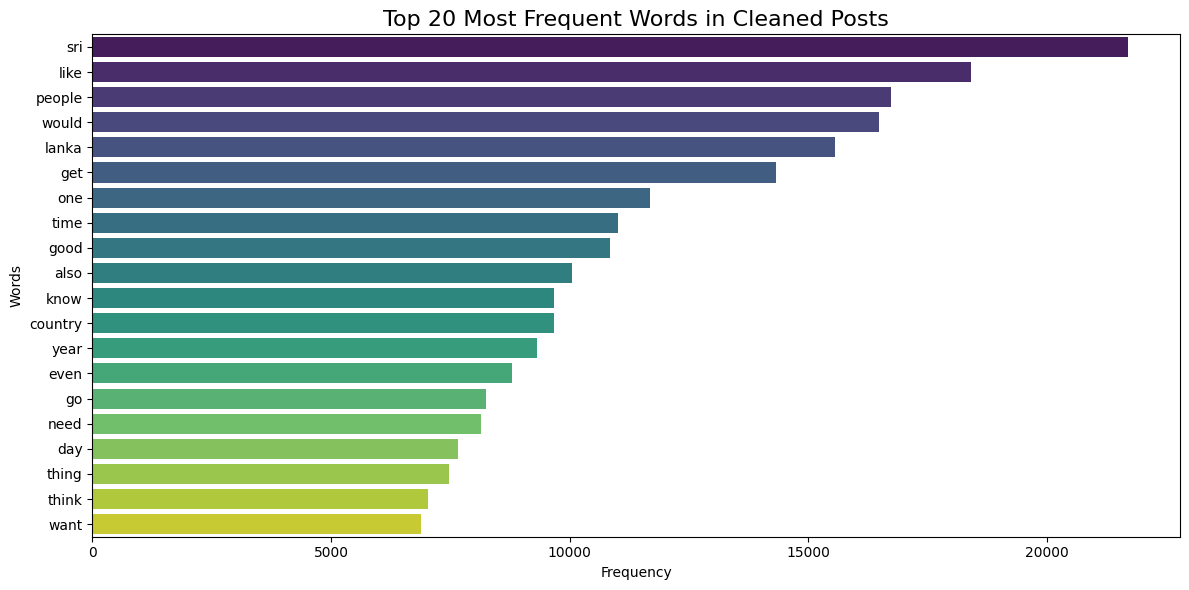

In [28]:
# Convert to lists
words, counts = zip(*top_words)

plt.figure(figsize=(12, 6))
sns.barplot(
    x=list(counts),
    y=list(words),
    palette="viridis"
)

plt.title("Top 20 Most Frequent Words in Cleaned Posts", fontsize=16)
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.tight_layout()
plt.show()

In [29]:
# # Apply cleaning function
# df_posts['content_cleaned'] = df_posts['content'].astype(str).apply(clean_text)

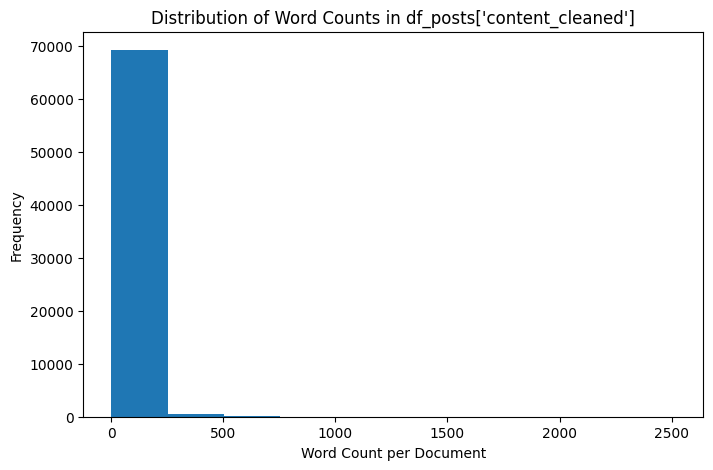

In [30]:
# Create a word count column
df_posts["word_count"] = df_posts["content_cleaned"].apply(lambda x: len(str(x).split()))

# Plot histogram of word counts
plt.figure(figsize=(8, 5))
plt.hist(df_posts["word_count"])
plt.xlabel("Word Count per Document")
plt.ylabel("Frequency")
plt.title("Distribution of Word Counts in df_posts['content_cleaned']")
plt.show()

In [37]:
# Compute recommended thresholds using quantiles
lower_threshold = df_posts["word_count"].quantile(0.45)
upper_threshold = df_posts["word_count"].quantile(0.98)

print("Lower Threshold (11th percentile):", lower_threshold)
print("Upper Threshold (95th percentile):", upper_threshold)

Lower Threshold (11th percentile): 15.0
Upper Threshold (95th percentile): 193.0


In [38]:
df_posts_backup = df_posts.copy()
df_posts = df_posts[
    (df_posts["word_count"] >= lower_threshold) &
    (df_posts["word_count"] <= upper_threshold)
]

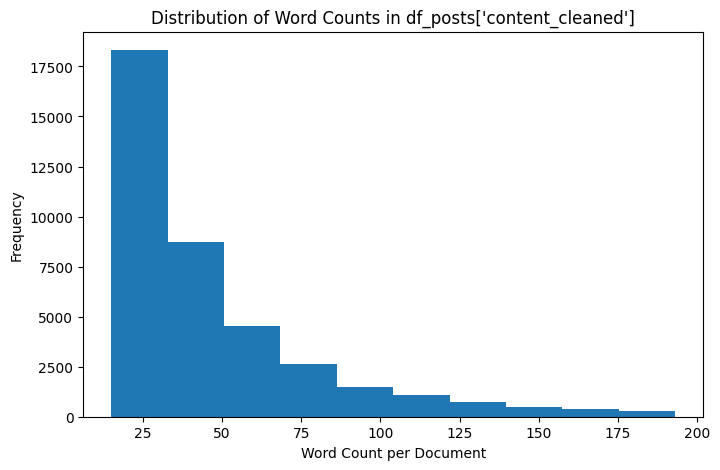

In [39]:
# Create a word count column
df_posts["word_count"] = df_posts["content_cleaned"].apply(lambda x: len(str(x).split()))

# Plot histogram of word counts
plt.figure(figsize=(8, 5))
plt.hist(df_posts["word_count"])
plt.xlabel("Word Count per Document")
plt.ylabel("Frequency")
plt.title("Distribution of Word Counts in df_posts['content_cleaned']")
plt.show()

In [40]:
# 12. Report corpus statistics
all_text = " ".join(df_posts['content_cleaned']) 
all_words = all_text.split()
total_words = len(all_words)
unique_words = len(set(all_words))

In [41]:
print(f"Total words in cleaned corpus: {total_words}")
print(f"Unique words in cleaned corpus: {unique_words}") 

Total words in cleaned corpus: 1762601
Unique words in cleaned corpus: 48339


In [42]:
df_posts.head(20)

,type,source,keyword,id,author,subreddit,content,score,num_comments,parent_post,created_date,created_time,content_cleaned,word_count
0,post,new,no keyword,1otaemb,Cookiehere6969,srilanka,Is this a Scam or good investment? Haritha Lan...,2.0,1.0,no post,2025-11-10,10:33:16,scam good investment haritha lanka agarwood pl...,33
1,post,new,no keyword,1otaam5,oshan789,srilanka,Villa units for sale in Unawatuna Sri Lanka ! ...,3.0,0.0,no post,2025-11-10,10:26:02,villa unit sale unawatuna sri lanka new projec...,101
4,post,new,no keyword,1ot9h2f,No-Leave8971,srilanka,Need advice from the experts 🙏 [](https://www....,2.0,0.0,no post,2025-11-10,09:33:57,need advice expert folded_hands planning podca...,63
5,post,new,no keyword,1ot9dyw,hotstar10,srilanka,Confusion Over Paddock Club Nugegoda’s Halal S...,0.0,4.0,no post,2025-11-10,09:28:19,confusion paddock club nugegoda halal status o...,42
6,post,new,no keyword,1ot9da2,prav_u,srilanka,Tour to Kanneliya Rain Forest I’m planning a g...,1.0,1.0,no post,2025-11-10,09:26:59,tour kanneliya rain forest planning group visi...,35
7,post,new,no keyword,1ot8r8a,Unusual-Witness-7304,srilanka,"ChatGPT vs electricians, my house wiring is no...",6.0,5.0,no post,2025-11-10,08:46:44,chatgpt v electrician house wiring science exp...,96
8,post,new,no keyword,1ot8lir,negative-impactr8888,srilanka,SLTMobitel changed the superuser router passwo...,3.0,0.0,no post,2025-11-10,08:36:16,sltmobitel changed superuser router password t...,54
9,post,new,no keyword,1ot8l95,Jakesbond007,srilanka,Can we hand carry medicine from abroad into Sr...,1.0,3.0,no post,2025-11-10,08:35:47,hand carry medicine abroad sri lanka hello med...,26
10,post,new,no keyword,1ot8kjb,sorenxv,srilanka,How Do I Get A Letter From Church? My bestfrie...,2.0,2.0,no post,2025-11-10,08:34:33,get letter church bestfriend's newborn getting...,36
11,post,new,no keyword,1ot87vn,ScreenshotSmuggler,srilanka,Guess where this video is from. Let's see how ...,21.0,43.0,no post,2025-11-10,08:11:13,guess video let u see far get province distric...,26


In [35]:
df_posts.shape

(48026, 14)

In [36]:
import unicodedata

def normalize_unicode(text):
    """
    Normalize unicode characters using NFKC.
    Converts full-width characters, combined characters, and compatibility characters 
    into a consistent canonical form.
    """
    return unicodedata.normalize("NFKC", text)

# Apply normalization
df_posts["content_cleaned"] = (
    df_posts["content_cleaned"]
    .astype(str)
    .apply(normalize_unicode)
)

In [37]:
df_posts.head(10)

,type,source,keyword,id,author,subreddit,content,score,num_comments,parent_post,created_date,created_time,content_cleaned,word_count
0,post,new,no keyword,1otaemb,Cookiehere6969,srilanka,Is this a Scam or good investment? Haritha Lan...,2.0,1.0,no post,2025-11-10,10:33:16,scam good investment haritha lanka agarwood pl...,32
2,post,new,no keyword,1ot9w1v,mgssjjsks,srilanka,Whats your hot take on Sri Lanka as the title ...,3.0,8.0,no post,2025-11-10,10:00:29,s hot sri lanka title say gimme hot,8
4,post,new,no keyword,1ot9h2f,No-Leave8971,srilanka,Need advice from the experts 🙏 [](https://www....,2.0,0.0,no post,2025-11-10,09:33:57,need advice expert plan podcast friend short e...,57
5,post,new,no keyword,1ot9dyw,hotstar10,srilanka,Confusion Over Paddock Club Nugegoda’s Halal S...,0.0,4.0,no post,2025-11-10,09:28:19,confusion paddock club nugegoda s halal status...,41
6,post,new,no keyword,1ot9da2,prav_u,srilanka,Tour to Kanneliya Rain Forest I’m planning a g...,1.0,1.0,no post,2025-11-10,09:26:59,tour kanneliya rain forest m plan group visit ...,32
7,post,new,no keyword,1ot8r8a,Unusual-Witness-7304,srilanka,"ChatGPT vs electricians, my house wiring is no...",6.0,5.0,no post,2025-11-10,08:46:44,chatgpt vs electrician house wiring science ex...,90
8,post,new,no keyword,1ot8lir,negative-impactr8888,srilanka,SLTMobitel changed the superuser router passwo...,3.0,0.0,no post,2025-11-10,08:36:16,sltmobitel change superuser router password tr...,42
9,post,new,no keyword,1ot8l95,Jakesbond007,srilanka,Can we hand carry medicine from abroad into Sr...,1.0,3.0,no post,2025-11-10,08:35:47,hand carry medicine abroad sri lanka hello med...,25
10,post,new,no keyword,1ot8kjb,sorenxv,srilanka,How Do I Get A Letter From Church? My bestfrie...,2.0,2.0,no post,2025-11-10,08:34:33,letter church bestfriend newborn getting bapti...,32
11,post,new,no keyword,1ot87vn,ScreenshotSmuggler,srilanka,Guess where this video is from. Let's see how ...,21.0,43.0,no post,2025-11-10,08:11:13,guess video let far province district division...,18


In [38]:
# save cleaned data

df_posts.to_csv("cleaned_Posts_Data.csv", index=False) 

In [39]:
# Load cleaned data
df_posts = pd.read_csv("cleaned_Posts_Data.csv")
df_posts.head()

,type,source,keyword,id,author,subreddit,content,score,num_comments,parent_post,created_date,created_time,content_cleaned,word_count
0,post,new,no keyword,1otaemb,Cookiehere6969,srilanka,Is this a Scam or good investment? Haritha Lan...,2.0,1.0,no post,2025-11-10,10:33:16,scam good investment haritha lanka agarwood pl...,32
1,post,new,no keyword,1ot9w1v,mgssjjsks,srilanka,Whats your hot take on Sri Lanka as the title ...,3.0,8.0,no post,2025-11-10,10:00:29,s hot sri lanka title say gimme hot,8
2,post,new,no keyword,1ot9h2f,No-Leave8971,srilanka,Need advice from the experts 🙏 [](https://www....,2.0,0.0,no post,2025-11-10,09:33:57,need advice expert plan podcast friend short e...,57
3,post,new,no keyword,1ot9dyw,hotstar10,srilanka,Confusion Over Paddock Club Nugegoda’s Halal S...,0.0,4.0,no post,2025-11-10,09:28:19,confusion paddock club nugegoda s halal status...,41
4,post,new,no keyword,1ot9da2,prav_u,srilanka,Tour to Kanneliya Rain Forest I’m planning a g...,1.0,1.0,no post,2025-11-10,09:26:59,tour kanneliya rain forest m plan group visit ...,32


# Tokenization

## Traditional Word-Based

In [43]:
# Word-level tokenizer

def word_tokenizer(text):
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
    doc = nlp(" ".join(tokens))
    return [token.lemma_ for token in doc]

In [44]:
df_posts["processed"] = df_posts["content_cleaned"].apply(word_tokenizer)

KeyboardInterrupt: 

## Prepare corpus for SentencePiece

In [42]:
# Prepare corpus for SentencePiece
corpus_file = "corpus.txt"
with open(corpus_file, "w", encoding="utf-8") as f:
    for t in df_posts["content_cleaned"]:
        f.write(t + "\n")

### BPE Tokenizer

In [43]:
spm.SentencePieceTrainer.Train(
    f"--input={corpus_file} --model_prefix=bpe --vocab_size=8000 --model_type=bpe"
)
bpe = spm.SentencePieceProcessor()
bpe.load("bpe.model")

True

### Unigram tokenizer

In [44]:
spm.SentencePieceTrainer.Train(
    f"--input={corpus_file} --model_prefix=unigram --vocab_size=8000 --model_type=unigram"
)
unigram = spm.SentencePieceProcessor()
unigram.load("unigram.model")

True

## Compare Tokenization Schemes Impact using Corpus Statistics

Calculating:
- vocabulary size
- average tokens per document
- total tokens
- rare token frequency (<3 occurrences)
- OOV rate (for word-based tokenizers only)

In [45]:
# Corpus statistics per tokenizer

def compute_stats(tokenizer_fn, tokenizer_name):
    all_tokens = []
    doc_lengths = []

    for text in df_posts["content_cleaned"]:
        tokens = tokenizer_fn(text)
        all_tokens.extend(tokens)
        doc_lengths.append(len(tokens))

    vocab = set(all_tokens)
    counter = collections.Counter(all_tokens)

    return {
        "Tokenizer": tokenizer_name,
        "Vocabulary Size": len(vocab),
        "Total Tokens": len(all_tokens),
        "Avg Tokens per Doc": sum(doc_lengths)/len(doc_lengths),
        "Rare Tokens (<3)": sum(1 for t,c in counter.items() if c < 3)
    }

stats_word = compute_stats(word_tokenizer, "Word+Lemmatization")
stats_bpe = compute_stats(lambda t: bpe.encode(t, out_type=str), "BPE")
stats_unigram = compute_stats(lambda t: unigram.encode(t, out_type=str), "Unigram LM")

stats_df = pd.DataFrame([stats_word, stats_bpe, stats_unigram])

In [46]:
stats_df

,Tokenizer,Vocabulary Size,Total Tokens,Avg Tokens per Doc,Rare Tokens (<3)
0,Word+Lemmatization,36117,1332752,27.750635,20773
1,BPE,8360,1549019,32.253758,636
2,Unigram LM,8528,1534041,31.941886,393


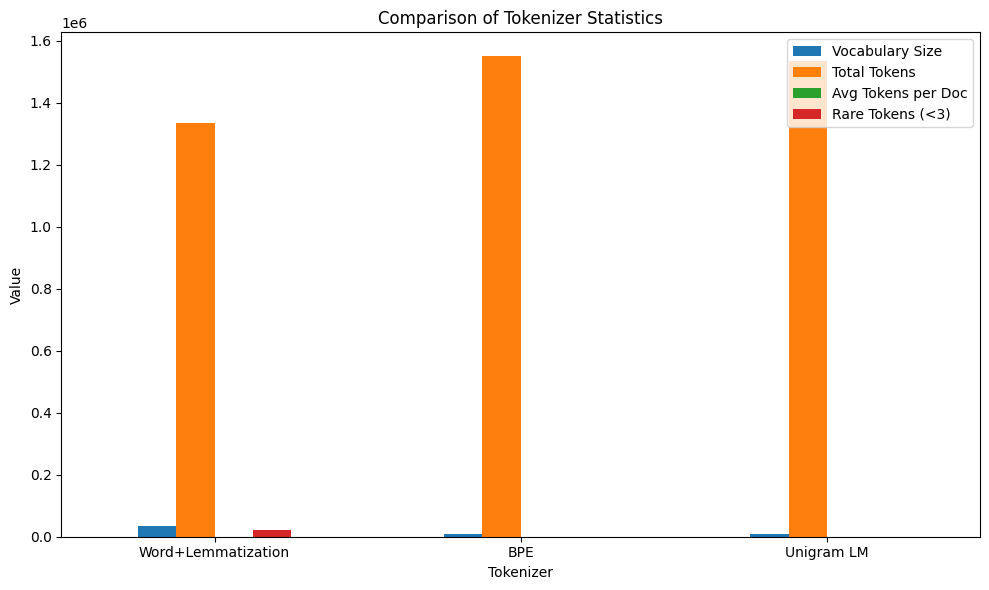

In [47]:
# Set index to Tokenizer (for easier plotting)
plot_df = stats_df.set_index("Tokenizer")

# Plot each metric
plot_df.plot(kind="bar", figsize=(10,6))
plt.title("Comparison of Tokenizer Statistics")
plt.xlabel("Tokenizer")
plt.ylabel("Value")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


The tokenization analysis shows clear differences between the three approaches: Word+Lemmatization, BPE, and Unigram LM—and the results strongly align with theoretical expectations. The word-level tokenizer produced an extremely large vocabulary of 47,222 items and a very high number of rare tokens (31,098), even after lemmatization and stopword removal. This indicates severe sparsity: each spelling variant, slang term, and morphological form becomes a separate token, making the representation unstable and prone to poor generalization. In contrast, BPE reduced the vocabulary size to 8,887 and dropped rare tokens to just 1,023, demonstrating its ability to decompose infrequent or noisy words into reusable subword units. This leads to a more robust and consistent representation, though at the cost of slightly longer token sequences, which is expected for subword models. The Unigram LM tokenizer achieved similar vocabulary compression (8,962 tokens) but yielded the lowest number of rare tokens (855), reflecting its probabilistic approach to selecting the most efficient and informative subword units. Overall, the results validate the progression predicted by NLP literature: word-level tokenization is the least efficient, BPE offers substantial improvements, and Unigram LM provides the most balanced and linguistically consistent tokenization strategy for noisy text data.


# Evaluate Tokenization Schemes and effectiveness for LLM Tasks

## LSTM Language Model

In [48]:
# Enable GPU Training

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [49]:
# Dataset class
class LMDataset(Dataset):
    def __init__(self, token_ids, seq_len=30):
        self.seq_len = seq_len
        self.data = token_ids

    def __len__(self):
        return len(self.data) - self.seq_len

    def __getitem__(self, idx):
        x = torch.tensor(self.data[idx:idx+self.seq_len], dtype=torch.long)
        y = torch.tensor(self.data[idx+1:idx+1+self.seq_len], dtype=torch.long)
        return x, y

In [50]:
# LSTM LM model
class LSTMLM(nn.Module):
    def __init__(self, vocab_size, embed_dim=128, hidden_dim=256):
        super().__init__()
        self.embed = nn.Embedding(vocab_size, embed_dim)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, vocab_size)

    def forward(self, x):
        e = self.embed(x)
        o, _ = self.lstm(e)
        return self.fc(o)

In [51]:
# Training function
def train_lm(model, dataloader, epochs=3, lr=0.001):
    model = model.to(device)
    optim = torch.optim.Adam(model.parameters(), lr=lr)
    loss_fn = nn.CrossEntropyLoss()
    
    for epoch in range(epochs):
        for x, y in dataloader:
            x, y = x.to(device), y.to(device)
            optim.zero_grad()
            pred = model(x)
            loss = loss_fn(pred.view(-1, pred.size(-1)), y.view(-1))
            loss.backward()
            optim.step()
    return model

In [52]:
# Perplexity
def perplexity(model, dataloader):
    model.eval()
    loss_fn = nn.CrossEntropyLoss()
    total_loss = 0
    total_tokens = 0
    with torch.no_grad():
        for x, y in dataloader:
            x, y = x.to(device), y.to(device)
            pred = model(x)
            loss = loss_fn(pred.view(-1, pred.size(-1)), y.view(-1))
            total_loss += loss.item() * x.numel()
            total_tokens += x.numel()
    return torch.exp(torch.tensor(total_loss / total_tokens))

### Train LSTMs per Tokenizer

In [53]:
# Hyperparameters
SEQ = 30
BATCH = 64

In [54]:
# Word-level Tokenizer
word_vocab = {w:i for i,w in enumerate(set(itertools.chain.from_iterable(
    df_posts["content_cleaned"].apply(word_tokenizer)
)))}
word_id = lambda toks: [word_vocab[t] for t in toks if t in word_vocab]

word_ids = list(itertools.chain.from_iterable(
    df_posts["content_cleaned"].apply(word_tokenizer).apply(word_id)
))
word_dl = DataLoader(LMDataset(word_ids, SEQ), batch_size=BATCH)
lm_word = LSTMLM(len(word_vocab)).to(device)
lm_word = train_lm(lm_word, word_dl)
pp_word = perplexity(lm_word, word_dl)
print("Word-level LM perplexity:", pp_word.item())

Word-level LM perplexity: 832.8785400390625


In [55]:
# BPE
bpe_ids = [i for t in df_posts["content_cleaned"] for i in bpe.encode(t)]
bpe_dl = DataLoader(LMDataset(bpe_ids, SEQ), batch_size=BATCH)
lm_bpe = LSTMLM(bpe.get_piece_size()).to(device)
lm_bpe = train_lm(lm_bpe, bpe_dl)
pp_bpe = perplexity(lm_bpe, bpe_dl)
print("BPE LM perplexity:", pp_bpe.item())

BPE LM perplexity: 486.02459716796875


In [56]:
# Unigram
uni_ids = [i for t in df_posts["content_cleaned"] for i in unigram.encode(t)]
uni_dl = DataLoader(LMDataset(uni_ids, SEQ), batch_size=BATCH)
lm_uni = LSTMLM(unigram.get_piece_size()).to(device)
lm_uni = train_lm(lm_uni, uni_dl) 
pp_uni = perplexity(lm_uni, uni_dl)
print("Unigram LM perplexity:", pp_uni.item())

Unigram LM perplexity: 503.12615966796875


### Analysis and Comparison

In [57]:
final_results = pd.DataFrame({
    "Tokenizer": ["Word+Lemmatization", "BPE", "Unigram"],
    "Vocabulary Size": [stats_word["Vocabulary Size"], stats_bpe["Vocabulary Size"], stats_unigram["Vocabulary Size"]],
    "Total Tokens": [stats_word["Total Tokens"], stats_bpe["Total Tokens"], stats_unigram["Total Tokens"]],
    "Avg Tokens per Doc": [stats_word["Avg Tokens per Doc"], stats_bpe["Avg Tokens per Doc"], stats_unigram["Avg Tokens per Doc"]],
    "Rare Tokens (<3)": [stats_word["Rare Tokens (<3)"], stats_bpe["Rare Tokens (<3)"], stats_unigram["Rare Tokens (<3)"]],
    "Perplexity": [pp_word, pp_bpe, pp_uni]
})
final_results

,Tokenizer,Vocabulary Size,Total Tokens,Avg Tokens per Doc,Rare Tokens (<3),Perplexity
0,Word+Lemmatization,36117,1332752,27.750635,20773,tensor(832.8785)
1,BPE,8360,1549019,32.253758,636,tensor(486.0246)
2,Unigram,8528,1534041,31.941886,393,tensor(503.1262)


The LSTM results clearly demonstrate how strongly recurrent models depend on the quality of tokenization. When trained on the word-level tokenizer, the LSTM produced the highest perplexity (884), largely because this tokenizer generated an extremely large vocabulary (over 36,000 unique words) and a very high proportion of rare terms. Such sparsity makes it difficult for the LSTM to learn stable embeddings or reliably predict the next token, since many words appear too infrequently for meaningful parameter updates. In contrast, both subword tokenizers (BPE and Unigram) dramatically reduced perplexity—approximately halving it—because they compress the vocabulary into a smaller, denser, and more frequent token space. This reduction in sparsity enables the LSTM to learn more generalizable patterns such as common stems, prefixes, and suffixes, improving its ability to model text sequences. BPE achieved the lowest perplexity (479), slightly outperforming Unigram, likely because BPE produces more deterministic and consistent subword units that better suit the LSTM’s sequential prediction process. Overall, the results show that subword tokenization substantially enhances LSTM performance by providing a more compact and informative input representation, while word-level tokenization overwhelms the model and leads to significantly poorer language modeling ability.